# 20240411筆記

常用Python影像處理:
* pillow
* scikit-image
* OpenCV

## 讀圖及秀圖

In [ ]:
import skimage as ski
from PIL import Image

In [ ]:
img = Image.open('lena.png')

In [ ]:
img

In [ ]:
img.mode

In [ ]:
img.size

In [ ]:
lena = ski.io.imread('lena.png')

In [ ]:
ski.io.imshow(lena)

## 彩色轉單色及圖片縮放

In [ ]:
img.convert('L').resize((32, 32))

In [ ]:
img01 = img.convert('L').resize((32, 32))

In [ ]:
import numpy as np
import plotly.express as px

In [ ]:
# 將 PIL 的圖片格式轉成 ndarray
aimg = np.array(img01)

In [ ]:
aimg

In [ ]:
px.imshow(aimg, color_continuous_scale='gray')

In [ ]:
px.imshow(aimg, color_continuous_scale='gray', text_auto=True)

In [ ]:
aimg

In [ ]:
x = list('abcdefghijklmn')

In [ ]:
x

In [ ]:
x[::2]

In [ ]:
px.imshow(aimg[::2,::2], color_continuous_scale='gray', text_auto=True)

In [ ]:
px.imshow(aimg, 
          color_continuous_scale='gray',
          text_auto=True,
          width=800, 
          height=800)

## Histogram

In [ ]:
aimg.ravel?

In [ ]:
np.arange(25).reshape(5, 5)

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data.ravel()

In [ ]:
px.histogram(aimg.ravel())

In [ ]:
px.histogram(aimg.ravel(), range_x=[0, 255], nbins=256)

In [ ]:
moon = ski.data.moon()

In [ ]:
px.imshow(moon, color_continuous_scale="gray")

In [ ]:
px.histogram(moon.ravel(), range_x=[0, 255], nbins=256)

In [ ]:
np.clip(moon, 50, 149)

In [ ]:
px.histogram(np.clip(moon, 50, 149).ravel(), range_x=[0, 255], nbins=256)

In [ ]:
newmoon = np.clip(moon, 50, 149)

In [ ]:
newmoon = ((newmoon - 50) / 100 * 255)

In [ ]:
px.imshow(moon, color_continuous_scale="gray")

In [ ]:
px.imshow(newmoon, color_continuous_scale="gray")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(moon, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(newmoon, cmap='gray')

In [ ]:
from skimage import exposure

In [ ]:
newmoon01 = exposure.rescale_intensity(moon, in_range=(50, 149))

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(moon, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(newmoon, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(newmoon01, cmap='gray')

In [ ]:
eq_moon = exposure.equalize_hist(moon)

In [ ]:
plt.subplot(1, 4, 1)
plt.imshow(moon, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(newmoon, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(newmoon01, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(eq_moon, cmap='gray')
plt.axis('off')

In [ ]:
px.histogram((eq_moon*255).ravel(), range_x=[0, 255], nbins=256)

In [ ]:
px.histogram(moon.ravel(), range_x=[0, 255], nbins=10)

In [ ]:
px.histogram((eq_moon*255).ravel(), range_x=[0, 255], nbins=10)

In [ ]:
moon

In [ ]:
newmoon01

In [ ]:
eq_moon

In [ ]:
eq_moon.min()

In [ ]:
eq_moon.max()

## Image Convolution

In [ ]:
img

In [ ]:
gray = img.convert('L')

In [ ]:
gray

In [ ]:
np.ones((3, 3))*1/9

In [ ]:
np.zeros((3, 3))

In [ ]:
filter01 = np.ones((3, 3))*1/9

In [ ]:
glena = np.array(gray)

In [ ]:
glena.shape

In [ ]:
newlena = np.zeros_like(glena)

In [ ]:
newlena.shape

In [ ]:
newlena

In [ ]:
x = np.ones((3, 3))
y = np.ones((3, 3))
x[0, 1] = 2
x[1, 2] = 3
y[0, 0] = -1
y[2, 2] = -2

In [ ]:
x

In [ ]:
y

In [ ]:
x * y

In [ ]:
np.sum(x*y)

In [ ]:
for i in range(1, 439):
    for j in range(1, 439):
        newlena[i, j] = np.sum(glena[i-1:i+2, j-1:j+2]*filter01)

In [ ]:
px.imshow(newlena, color_continuous_scale="gray")

In [ ]:
filter02 = np.ones((7, 7))/49

In [ ]:
filter02

In [ ]:
newlena01 = np.zeros_like(glena)

In [ ]:
for i in range(3, 437):
    for j in range(3, 437):
        newlena01[i, j] = np.sum(glena[i-3:i+4, j-3:j+4]*filter02)

In [ ]:
px.imshow(newlena01, color_continuous_scale="gray")

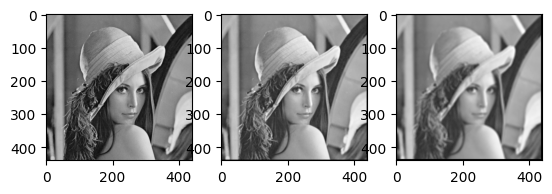

In [120]:
plt.subplot(1, 3, 1)
plt.imshow(glena, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(newlena, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(newlena01, cmap="gray")